In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [32]:
df = pd.read_csv('titanic.csv',usecols= ['Age','Survived','Fare'])
df['Age'].fillna(df['Age'].mean(),inplace= True)
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_test

/var/folders/cl/nx895lk15wz0q6n08sgg8vtr0000gn/T/ipykernel_41903/1915056132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace= True)
/var/folders/cl/nx895lk15wz0q6n08sgg8vtr0000gn/T/ipykernel_41903/1915056132.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,Age,Fare
39,30.27259,56.4958
30,50.00000,26.0000
38,25.00000,9.5000
310,18.00000,8.6625
305,64.00000,26.5500
...,...,...
93,30.27259,8.0500
262,29.00000,23.0000
33,30.27259,23.4500
104,16.00000,8.5167


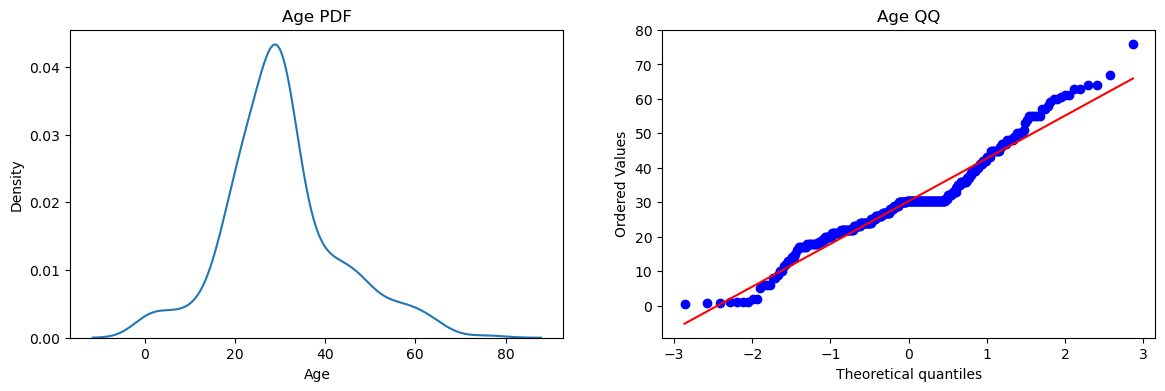

In [33]:
# for age
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist= 'norm', plot= plt)
plt.title('Age QQ')
plt.show()

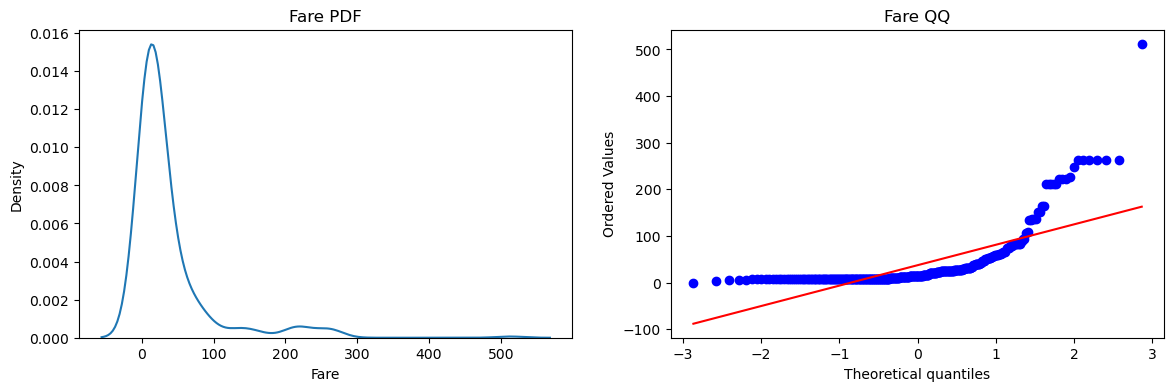

In [34]:
# for fare
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist= 'norm', plot= plt)
plt.title('Fare QQ')
plt.show()

In [35]:
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y2_pred = clf2.predict(X_test)
print("Accuracy score of DecisionTreeClassifier is: ", accuracy_score(y_test, y_pred) )
print("Accuracy score of LogisticRegression is: ", accuracy_score(y_test, y2_pred) )


Accuracy score of DecisionTreeClassifier is:  0.6428571428571429
Accuracy score of LogisticRegression is:  0.6666666666666666


In [36]:
trf = FunctionTransformer(func= np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y2_pred = clf2.predict(X_test_transformed)
print("Accuracy score of DecisionTreeClassifier is: ", accuracy_score(y_test, y_pred) )
print("Accuracy score of LogisticRegression is: ", accuracy_score(y_test, y2_pred) )

Accuracy score of DecisionTreeClassifier is:  0.6428571428571429
Accuracy score of LogisticRegression is:  0.6428571428571429


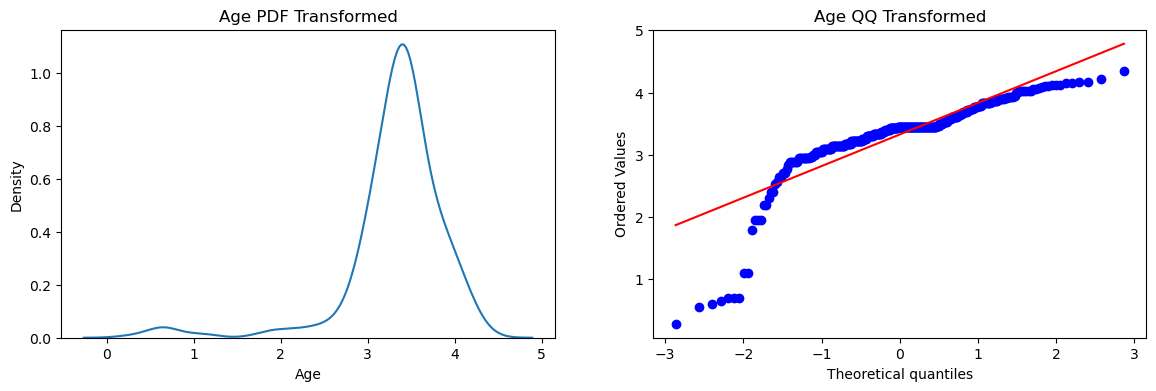

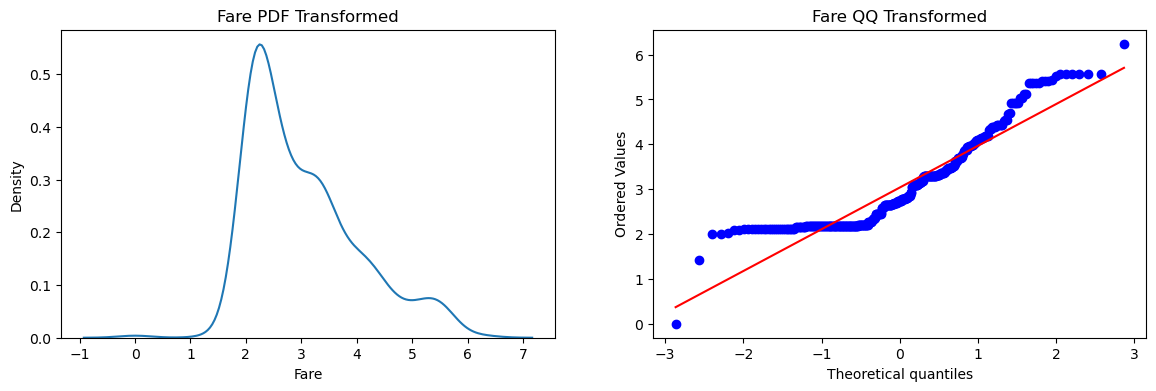

In [37]:
# for age
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.kdeplot(X_train_transformed['Age'])
plt.title('Age PDF Transformed')

plt.subplot(122)
stats.probplot(X_train_transformed ['Age'], dist= 'norm', plot= plt)
plt.title('Age QQ Transformed')
plt.show()


# for fare
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.kdeplot(X_train_transformed['Fare'])
plt.title('Fare PDF Transformed')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist= 'norm', plot= plt)
plt.title('Fare QQ Transformed')
plt.show()


As we can see that age was better before and fare is better now so we are just going to apply Function transform on the fare column

In [39]:
trf10 = ColumnTransformer([
    ('Fare_transform', FunctionTransformer(np.log1p),['Fare'])], remainder= 'passthrough')
X_train_transformed2  = trf10.fit_transform(X_train)
X_test_transformed2 = trf10.transform(X_test)



In [40]:
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y2_pred = clf2.predict(X_test_transformed2)
print("Accuracy score of DecisionTreeClassifier is: ", accuracy_score(y_test, y_pred) )
print("Accuracy score of LogisticRegression is: ", accuracy_score(y_test, y2_pred) )

Accuracy score of DecisionTreeClassifier is:  0.6309523809523809
Accuracy score of LogisticRegression is:  0.6190476190476191
